In [1]:
#load variables from prefin notebook
%store -r newsgroup

In [2]:
#experiment with half of the newsgroup
newsgroup.target = newsgroup.target[0:10000]
newsgroup.data = newsgroup.data[0:10000]

In [3]:
newsgroup.target

array([2, 0, 4, ..., 3, 0, 0])

In [4]:
newsgroup.data[0]

"\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [5]:
len(newsgroup.data)

10000

In [6]:
import gensim

In [7]:
def read_corpus(docs, tokens_only=False):
    for i, text in enumerate(docs):
        if tokens_only:
            yield gensim.utils.simple_preprocess(text)
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(gensim.utils.simple_preprocess(text), [i])

In [8]:
tokenizedDocs = list(read_corpus(newsgroup.data))

In [9]:
tokenizedDocs[1]

TaggedDocument(words=['my', 'brother', 'is', 'in', 'the', 'market', 'for', 'high', 'performance', 'video', 'card', 'that', 'supports', 'vesa', 'local', 'bus', 'with', 'mb', 'ram', 'does', 'anyone', 'have', 'suggestions', 'ideas', 'on', 'diamond', 'stealth', 'pro', 'local', 'bus', 'orchid', 'farenheit', 'ati', 'graphics', 'ultra', 'pro', 'any', 'other', 'high', 'performance', 'vlb', 'card', 'please', 'post', 'or', 'email', 'thank', 'you', 'matt'], tags=[1])

In [10]:
#50 d vec
#min_count (int, optional) – Ignores all words with total frequency lower than this.

model = gensim.models.doc2vec.Doc2Vec(vector_size=100, min_count=2, epochs=40)

In [11]:
# %store -r vocab1
# %store -r vocab2

In [12]:
# tokenizedVocab = list(read_corpus(vocab1))


In [13]:
# tokenizedVocab

In [14]:

model.build_vocab(tokenizedDocs)

In [15]:
#train
%time model.train(tokenizedDocs, total_examples=model.corpus_count, epochs=model.epochs)

CPU times: user 2min 39s, sys: 4.84 s, total: 2min 44s
Wall time: 1min 8s


In [16]:
# #check if docs are most similar to themselves (which would be good)
# ranks = []
# second_ranks = []
# for doc_id in range(len(tokenizedDocs)):
#     inferred_vector = model.infer_vector(tokenizedDocs[doc_id].words)
#     sims = model.docvecs.most_similar([inferred_vector], topn=5)
#     #rank = [docid for docid, sim in sims].index(doc_id)
#     #ranks.append(rank)
    
#     second_ranks.append(sims[1])

In [17]:

# collections.Counter(ranks)  # Results vary between runs due to random seeding and very small corpus

In [18]:
model.docvecs[3]
import numpy as np

In [19]:
X = np.vstack((model.docvecs[0],model.docvecs[1]))
for x in range(2,len(model.docvecs)):
    X = np.vstack((X,model.docvecs[x]))

In [20]:
X[3]

array([ 0.64137703, -0.42626995, -0.5393273 , -0.44956696,  0.60694695,
        0.76198834,  1.1964703 , -0.652792  ,  0.65937185, -0.2289954 ,
        0.3008803 , -0.3030784 , -0.5296094 ,  1.4120543 ,  0.18943487,
        0.9100411 ,  0.8146467 ,  1.5249414 , -1.5286788 ,  0.6863094 ,
        1.2548475 ,  0.63050866,  0.6073898 , -0.95041984,  0.32407624,
       -0.21825492,  0.20919167,  2.369177  ,  0.81228334,  0.54137886,
        0.71806586,  0.50516194,  0.23077577,  0.6334839 ,  0.5035967 ,
        1.3175391 , -0.44353017,  0.19969699,  0.7022744 , -1.6613951 ,
        0.09813459,  0.11337996, -0.51252955, -0.47220004, -0.44962028,
        0.30888885,  0.48429272,  1.6148903 , -0.5645742 ,  1.3578439 ,
        0.18846682, -0.13715273, -1.1345682 , -0.07170855, -0.0118582 ,
        0.03307411,  0.9472383 ,  2.1924503 , -0.80523   ,  0.49312034,
       -0.10424107,  0.24678499,  0.9447777 ,  0.41971725, -0.02976205,
       -0.12671435,  0.17946368, -0.5177367 , -0.973377  , -0.49

In [21]:
#array should be samples going down, dimensions going across
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2)

In [23]:
X.astype('Float32')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  """Entry point for launching an IPython kernel.


array([[ 1.1523564 , -0.56706434, -0.4728221 , ..., -0.5422993 ,
        -0.04864681, -1.6371297 ],
       [ 0.27271348, -0.02063365, -0.23833922, ...,  0.38602313,
        -0.25579834, -0.5438976 ],
       [ 0.8165952 ,  1.2711618 ,  1.7303965 , ...,  1.112049  ,
         0.57785803,  0.36335433],
       ...,
       [ 0.06053007, -0.1937149 , -0.10187973, ..., -0.3051822 ,
        -0.06544811, -0.05344467],
       [ 0.18930322,  0.18363956,  0.21874763, ...,  0.1656322 ,
        -0.11076786, -0.53175306],
       [-0.13322778,  0.7340314 , -0.5359394 , ..., -0.07001851,
         1.7339126 , -0.7199796 ]], dtype=float32)

In [24]:
twoDdocVecs = pca.fit_transform(X)

In [25]:
twoDdocVecs

array([[ 0.8992041 , -3.7602117 ],
       [-0.4434803 , -0.33193588],
       [ 3.7538998 , -1.3101163 ],
       ...,
       [-0.84302944, -0.22150767],
       [-0.5077533 ,  0.18234687],
       [-2.5541227 ,  4.879312  ]], dtype=float32)

In [26]:
len(twoDdocVecs)

10000

In [27]:
twoDdocVecs[0]

array([ 0.8992041, -3.7602117], dtype=float32)

In [28]:
twoDdocVecs = np.transpose(twoDdocVecs)

In [29]:
twoDdocVecs[1]

array([-3.7602117 , -0.33193588, -1.3101163 , ..., -0.22150767,
        0.18234687,  4.879312  ], dtype=float32)

In [30]:
# 6 colors
colormap = np.array([
    "#f44b42", "#f4e241", "#a3f441", "#41f4be", "#4182f4",
    "#a341f4"])

In [31]:
from bokeh.plotting import output_file, figure, show
import bokeh.plotting as bp
from bokeh.plotting import save
from bokeh.models import HoverTool
from bokeh.models import ColumnDataSource 

In [32]:
#plot PCA 
title = 'PCA for doc2Vec vocab 1'
num_example = len(model.docvecs)

plot_lda = bp.figure(plot_width=1400, plot_height=1100,
                     title=title,
                     tools="pan,wheel_zoom,box_zoom,reset,hover,previewsave",
                     x_axis_type=None, y_axis_type=None, min_border=1)


######
#######
#####

#data = {'content': news[:num_example], 'topic_key': _lda_keys[:num_example], 'x':tsne_lda[:, 0], 'y':tsne_lda[:, 1], 'colorMap':colormap[_lda_keys][:num_example]}
data = {'topic_key': newsgroup.target, 'x':twoDdocVecs[0], 'y':twoDdocVecs[1], 'colorMap':colormap[newsgroup.target][:num_example]}

source = ColumnDataSource(data)




plot_lda.scatter(x='x', y='y',
                 color='colorMap',
                 alpha = 0.25,
                 source=source)

bokeh.models.renderers.GlyphRenderer(
    id='2ad2832b-690c-4dc0-b4c1-0cc4a344e3a4',
    data_source=bokeh.models.sources.ColumnDataSource(
        id='721842cb-cd09-497c-ae88-a08d7a793d69',
        callback=None,
        data={'colorMap': ['#a3f441',
          '#f44b42',
          '#4182f4',
          '#f44b42',
          '#f44b42',
          '#41f4be',
          '#f44b42',
          '#a3f441',
          '#a3f441',
          '#a341f4',
          '#a341f4',
          '#41f4be',
          '#a341f4',
          '#41f4be',
          '#a341f4',
          '#4182f4',
          '#41f4be',
          '#41f4be',
          '#41f4be',
          '#a3f441',
          '#a3f441',
          '#f44b42',
          '#f44b42',
          '#a3f441',
          '#a3f441',
          '#41f4be',
          '#4182f4',
          '#f44b42',
          '#f4e241',
          '#a341f4',
          '#a3f441',
          '#4182f4',
          '#f44b42',
          '#a3f441',
          '#41f4be',
          '#f44b42',
          '#f44b42',
          '#4182f4',
          '#a3f441',
          '#a3f441',
          '#a341f4',
          '#f44b42',
          '#41f4be',
          '#a3f441',
          '#a3f441',
          '#f44b42',
          '#f44b42',
          '#f4e241',
          '#41f4be',
          '#f44b42',
          '#41f4be',
          '#a3f441',
          '#4182f4',
          '#41f4be',
          '#a3f441',
          '#a3f441',
          '#a341f4',
          '#f44b42',
          '#a341f4',
          '#a3f441',
          '#a3f441',
          '#f44b42',
          '#f44b42',
          '#f44b42',
          '#4182f4',
          '#41f4be',
          '#a3f441',
          '#41f4be',
          '#f44b42',
          '#f44b42',
          '#f44b42',
          '#4182f4',
          '#f4e241',
          '#41f4be',
          '#a341f4',
          '#41f4be',
          '#a3f441',
          '#f44b42',
          '#a341f4',
          '#a3f441',
          '#41f4be',
          '#a3f441',
          '#f44b42',
          '#41f4be',
          '#f44b42',
          '#a341f4',
          '#4182f4',
          '#41f4be',
          '#a3f441',
          '#a341f4',
          '#a3f441',
          '#a341f4',
          '#a341f4',
          '#f44b42',
          '#4182f4',
          '#f44b42',
          '#f44b42',
          '#a3f441',
          '#4182f4',
          '#f44b42',
          '#4182f4',
          '#f44b42',
          '#f44b42',
          '#4182f4',
          '#a341f4',
          '#a3f441',
          '#f44b42',
          '#4182f4',
          '#f4e241',
          '#f44b42',
          '#f44b42',
          '#a3f441',
          '#41f4be',
          '#f44b42',
          '#4182f4',
          '#4182f4',
          '#41f4be',
          '#41f4be',
          '#a3f441',
          '#f44b42',
          '#f44b42',
          '#41f4be',
          '#f44b42',
          '#41f4be',
          '#4182f4',
          '#f44b42',
          '#f44b42',
          '#a3f441',
          '#41f4be',
          '#f44b42',
          '#4182f4',
          '#a341f4',
          '#4182f4',
          '#a3f441',
          '#f44b42',
          '#4182f4',
          '#f44b42',
          '#41f4be',
          '#f44b42',
          '#a3f441',
          '#a341f4',
          '#f44b42',
          '#a3f441',
          '#f44b42',
          '#41f4be',
          '#41f4be',
          '#f44b42',
          '#f44b42',
          '#a3f441',
          '#f4e241',
          '#a3f441',
          '#a3f441',
          '#f44b42',
          '#f44b42',
          '#4182f4',
          '#f44b42',
          '#a3f441',
          '#4182f4',
          '#41f4be',
          '#f44b42',
          '#f44b42',
          '#f44b42',
          '#41f4be',
          '#a341f4',
          '#f44b42',
          '#f44b42',
          '#a341f4',
          '#41f4be',
          '#f44b42',
          '#41f4be',
          '#f44b42',
          '#41f4be',
          '#f44b42',
          '#a341f4',
          '#f44b42',
          '#f44b42',
          '#a3f441',
          '#a341f4',
          '#a3f441',
          

In [33]:
show(plot_lda)

In [34]:
print(newsgroup.target[10:1000])

[5 3 5 3 5 4 3 3 3 2 2 0 0 2 2 3 4 0 1 5 2 4 0 2 3 0 0 4 2 2 5 0 3 2 2 0 0
 1 3 0 3 2 4 3 2 2 5 0 5 2 2 0 0 0 4 3 2 3 0 0 0 4 1 3 5 3 2 0 5 2 3 2 0 3
 0 5 4 3 2 5 2 5 5 0 4 0 0 2 4 0 4 0 0 4 5 2 0 4 1 0 0 2 3 0 4 4 3 3 2 0 0
 3 0 3 4 0 0 2 3 0 4 5 4 2 0 4 0 3 0 2 5 0 2 0 3 3 0 0 2 1 2 2 0 0 4 0 2 4
 3 0 0 0 3 5 0 0 5 3 0 3 0 3 0 5 0 0 2 5 2 2 2 2 4 3 0 0 4 4 4 5 1 5 3 5 5
 5 4 1 3 0 5 0 5 0 0 2 1 5 3 5 2 0 0 0 2 4 0 4 3 3 2 5 0 2 3 5 3 2 2 2 2 0
 3 0 2 0 5 2 2 0 3 3 3 3 1 1 0 2 5 5 0 3 0 0 4 0 3 4 0 0 0 3 3 3 0 0 0 3 2
 0 0 3 4 0 3 5 4 0 3 5 3 5 5 2 0 4 4 3 0 0 0 4 4 0 0 0 1 4 0 3 5 5 0 4 2 0
 0 4 2 3 0 2 5 3 2 0 3 4 3 5 4 0 5 0 0 2 3 2 0 2 3 0 0 2 0 0 5 3 0 3 0 4 0
 5 4 5 4 4 5 3 0 4 3 1 4 5 2 0 3 0 0 2 5 2 4 2 3 5 4 0 0 2 2 4 5 2 5 5 0 3
 3 5 0 3 3 2 2 0 2 2 3 5 2 2 2 4 0 0 5 0 0 5 2 5 3 3 5 3 3 3 2 0 5 2 3 3 4
 4 1 5 3 3 0 3 4 5 3 2 3 2 0 4 2 3 2 5 0 0 0 4 2 0 3 5 0 3 3 0 2 0 1 3 5 3
 5 0 0 2 2 0 2 1 0 1 0 1 0 0 5 0 1 4 0 0 2 5 0 5 0 5 5 0 3 0 0 0 2 5 3 5 2
 2 0 1 3 3 2 4 2 0 5 0 0 

In [35]:
#horizontal array of zeros
t = np.zeros((1, 2))
t


array([[0., 0.]])

In [36]:
X[0]

array([ 1.1523564 , -0.56706434, -0.4728221 , -0.560768  ,  0.5409664 ,
       -1.4436541 ,  0.7938134 , -0.02933861, -0.6210093 ,  0.7875261 ,
        1.0526646 , -0.32521415, -1.412102  , -0.7767719 , -0.85666746,
       -0.9283701 ,  0.12938607,  0.31247064,  0.5521408 ,  0.25090438,
       -0.28073123,  0.37761346,  0.7717907 ,  0.65816844, -0.12822457,
        0.9781309 ,  0.19826269,  0.39135775,  0.5865921 ,  0.37868455,
        1.3238577 , -0.6286061 , -0.5874625 ,  0.87840986,  0.33134225,
        1.5563735 ,  0.51460695, -0.42850587,  0.9013814 ,  0.0904493 ,
       -0.4160432 , -0.62145656, -0.5374461 , -1.1470779 ,  0.54391515,
        0.20147789,  0.00803121, -1.195529  , -0.14644095, -1.2608898 ,
        0.02076037, -1.1929258 ,  0.00247354,  0.18561842, -1.031705  ,
        0.3199141 , -0.03393229, -1.2637523 ,  0.23014675, -1.0535419 ,
       -0.67041844,  0.17940049,  1.0358331 , -0.20497537, -2.1007187 ,
       -0.8022609 ,  2.192396  ,  0.48774004, -0.7111325 , -0.71

In [37]:
#Now Use KMEANS
#KMEANS TIME for doc2vec w many words
from sklearn.cluster import KMeans

In [38]:
#twoDdocVecs

In [39]:
X_doc2vec = np.column_stack((twoDdocVecs[0],twoDdocVecs[1]))

In [40]:
kmeans = KMeans(n_clusters=6, random_state=0).fit(X_doc2vec)

In [41]:
kMeanCentersD2V = kmeans.cluster_centers_

In [42]:
kMeanCentersD2V

array([[ 0.28180918, -3.0031838 ],
       [ 6.1816063 ,  1.4895998 ],
       [-0.33736265, -0.27131486],
       [-1.4178206 ,  5.5086565 ],
       [-1.9299353 ,  0.67453426],
       [ 2.0596936 ,  0.37550893]], dtype=float32)

In [43]:
import matplotlib.pyplot as plt
import matplotlib.colors as mplc

In [44]:
y = newsgroup.target

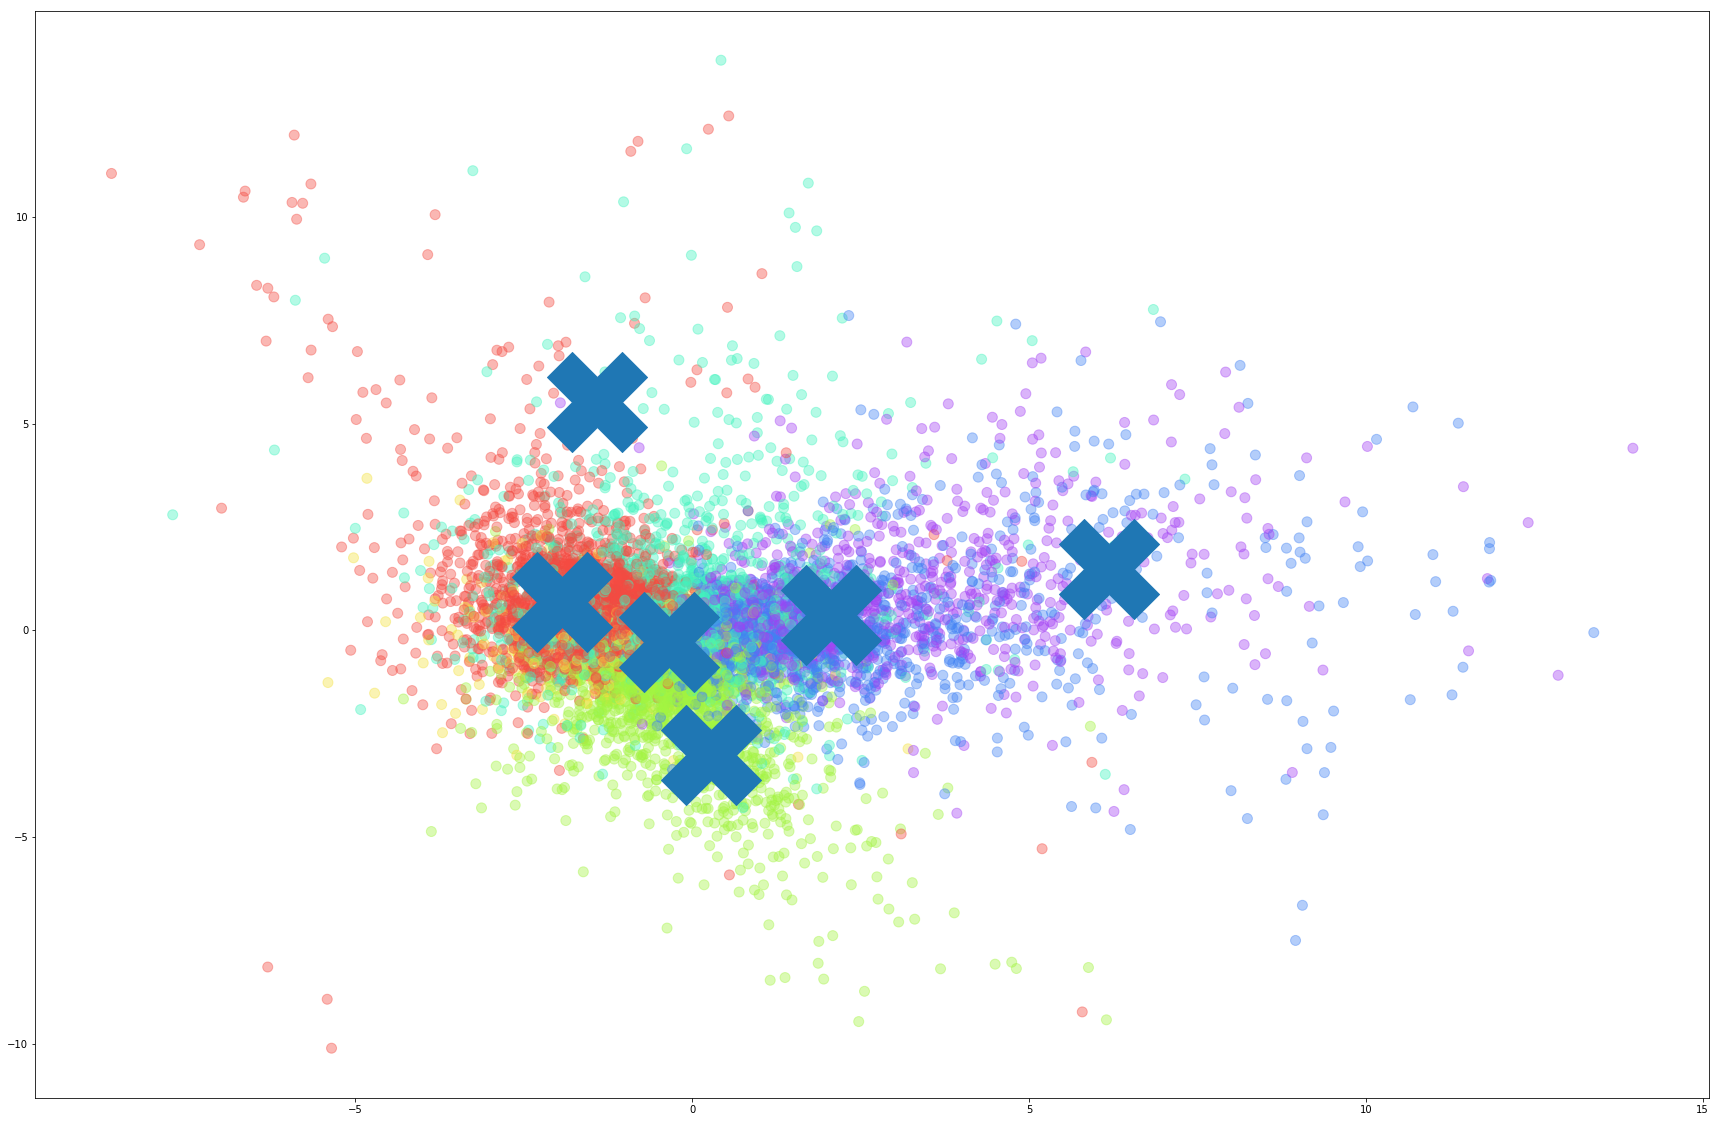

In [45]:
plt.figure(2, figsize=(30, 20),)
plt.scatter(twoDdocVecs[0], twoDdocVecs[1],s=100, c=y, cmap=mplc.ListedColormap(colormap), alpha=0.4)
plt.scatter(kMeanCentersD2V[:, 0],kMeanCentersD2V[:, 1],marker='X',s=10000)

In [46]:
from sklearn.metrics import normalized_mutual_info_score

In [48]:
a = kmeans.predict(np.transpose(twoDdocVecs))

In [49]:
normalized_mutual_info_score(y,a)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.2529285220033843